In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
crimerate_df = pd.read_csv("./Data/crimen_nac.csv", encoding="latin1") #added encoding="latin1" to avoid encoding error of special characters in the file
#crimerate_df.info()
crimerate_df.isnull().sum()


Año                            0
Clave_Ent                      0
Entidad                        0
Bien jurídico afectado         0
Tipo de delito                 0
Subtipo de delito              0
Modalidad                      0
Enero                          0
Febrero                        0
Marzo                          0
Abril                          0
Mayo                           0
Junio                          0
Julio                       9344
Agosto                      9344
Septiembre                  9344
Octubre                     9344
Noviembre                   9344
Diciembre                   9344
Sexo/Averiguación previa       0
Rango de edad                  0
dtype: int64

In [6]:
states = crimerate_df['Entidad'].unique()
legal_rigths= crimerate_df['Bien jurídico afectado'].unique()
legal_rigths
type_crime = crimerate_df['Tipo de delito'].unique()
subtypes = crimerate_df['Subtipo de delito'].unique()
mode = crimerate_df['Modalidad'].unique()
ageRange = crimerate_df['Rango de edad'].unique()
print(ageRange)
#getting all the unique values of the columns to see the data
years = crimerate_df['Año'].unique()

['No aplica' 'Menores de edad (0-17)' 'Adultos (18 y más)'
 'No especificado' 'No identificado']


In [7]:
filas_nulas_col1 = crimerate_df[crimerate_df['Julio'].isnull()]
filas_nulas_col1.isnull().sum()
#the data from the data set only goes from January 2015 to June 2023, so the data from July 2023 and beyond is not available

Año                            0
Clave_Ent                      0
Entidad                        0
Bien jurídico afectado         0
Tipo de delito                 0
Subtipo de delito              0
Modalidad                      0
Enero                          0
Febrero                        0
Marzo                          0
Abril                          0
Mayo                           0
Junio                          0
Julio                       9344
Agosto                      9344
Septiembre                  9344
Octubre                     9344
Noviembre                   9344
Diciembre                   9344
Sexo/Averiguación previa       0
Rango de edad                  0
dtype: int64

In [8]:
sex= crimerate_df['Sexo/Averiguación previa'].unique()
age = crimerate_df['Rango de edad'].unique()
sex
age

array(['No aplica', 'Menores de edad (0-17)', 'Adultos (18 y más)',
       'No especificado', 'No identificado'], dtype=object)

In [9]:
crimerate_df[['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']] = crimerate_df[['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']].astype(float)
#transforming the columns from object to float to be able to work with them easier

In [10]:
# there is a lot of columns with the same data, so we can group the data to have a better data set
df_grouped = crimerate_df.groupby(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad','Sexo/Averiguación previa','Rango de edad'], as_index=False).sum()
display(df_grouped)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,41.0,...,31.0,22.0,36.0,43.0,30.0,40.0,40.0,34.0,43.0,26.0
1,2015,1,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,201.0,...,182.0,160.0,121.0,166.0,160.0,151.0,178.0,133.0,121.0,107.0
2,2015,1,Aguascalientes,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,19.0,...,13.0,14.0,13.0,19.0,12.0,15.0,19.0,22.0,10.0,8.0
3,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),1.0,...,1.0,2.0,3.0,0.0,0.0,3.0,2.0,1.0,4.0,2.0
4,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82939,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Evasión de presos,Evasión de presos,Evasión de presos,Averiguación previa,No aplica,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82940,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsedad,Falsedad,Falsedad,Averiguación previa,No aplica,22.0,...,19.0,25.0,35.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
82941,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Averiguación previa,No aplica,15.0,...,11.0,10.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
82942,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,Narcomenudeo,Narcomenudeo,Averiguación previa,No aplica,28.0,...,39.0,23.0,28.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:

df_grouped

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,41.0,...,31.0,22.0,36.0,43.0,30.0,40.0,40.0,34.0,43.0,26.0
1,2015,1,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,201.0,...,182.0,160.0,121.0,166.0,160.0,151.0,178.0,133.0,121.0,107.0
2,2015,1,Aguascalientes,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,19.0,...,13.0,14.0,13.0,19.0,12.0,15.0,19.0,22.0,10.0,8.0
3,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),1.0,...,1.0,2.0,3.0,0.0,0.0,3.0,2.0,1.0,4.0,2.0
4,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82939,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Evasión de presos,Evasión de presos,Evasión de presos,Averiguación previa,No aplica,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82940,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsedad,Falsedad,Falsedad,Averiguación previa,No aplica,22.0,...,19.0,25.0,35.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
82941,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Averiguación previa,No aplica,15.0,...,11.0,10.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
82942,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,Narcomenudeo,Narcomenudeo,Averiguación previa,No aplica,28.0,...,39.0,23.0,28.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0


## ¿Qué son las averiguaciones previas?
- Las averiguaciones previas son cuando no se tiene informacion completa del crimen o la investigacion sigue en curso

In [12]:
states

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [13]:
#contar cuantas lineas de averiguaciones previas hay en total
averiguacion = df_grouped['Sexo/Averiguación previa'].value_counts()
print(averiguacion)
coordenadas = {"Aguascalientes": {"lat": 21.8818, "lon": -102.2916},"Baja California":{"lat": 30.8406, "lon": -115.2838},"Baja California Sur":{"lat": 26.0444, "lon": -111.6661},"Campeche":{"lat": 19.8301, "lon": -90.5349},
"Coahuila de Zaragoza":{"lat": 27.0587, "lon": -101.7068},"Colima":{"lat": 19.2452, "lon": -103.7241},"Chiapas":{"lat": 16.7569, "lon": -93.1292},"Chihuahua":{"lat": 28.6330, "lon": -106.0691},
"Ciudad de México":{"lat": 19.4326, "lon": -99.1332},"Durango":{"lat": 24.0277, "lon": -104.6532},"Guanajuato":{"lat": 21.0190, "lon": -101.2574},"Guerrero":{"lat": 17.5734, "lon": -99.5279},
"Hidalgo":{"lat": 20.0911, "lon": -98.7624},"Jalisco":{"lat": 20.6595, "lon": -103.3494},"México":{"lat": 19.4969, "lon": -99.7233},"Michoacán de Ocampo":{"lat": 19.5665, "lon": -101.7068},
"Morelos":{"lat": 18.6813, "lon": -99.1013},"Nayarit":{"lat": 21.7514, "lon": -104.8455},"Nuevo León":{"lat": 25.5922, "lon": -99.9962},"Oaxaca":{"lat": 17.0732, "lon": -96.7266},
"Puebla":{"lat": 19.0414, "lon": -98.2063},"Querétaro":{"lat": 20.5888, "lon": -100.3899},"Quintana Roo":{"lat": 19.1817, "lon": -88.4791},"San Luis Potosí":{"lat": 22.1566, "lon": -100.9855},
"Sinaloa":{"lat": 25.1721, "lon": -107.4795},"Sonora":{"lat": 29.2972, "lon": -110.3300},"Tabasco":{"lat": 17.8409, "lon": -92.6189},"Tamaulipas":{"lat": 24.2669, "lon": -98.8363},
"Tlaxcala":{"lat": 19.3139, "lon": -98.2405},"Veracruz de Ignacio de la Llave":{"lat": 19.1738, "lon": -96.1342},"Yucatán":{"lat": 20.7099, "lon": -89.0943},"Zacatecas":{"lat": 22.7709, "lon": -102.5832}}

Sexo/Averiguación previa
Mujer                  30240
Hombre                 26784
Averiguación previa    16704
No identificado         9216
Name: count, dtype: int64


In [14]:
df_grouped['lat'] = df_grouped['Entidad'].map(lambda x: coordenadas[x]['lat'])
df_grouped['lon'] = df_grouped['Entidad'].map(lambda x: coordenadas[x]['lon'])



In [15]:
df_grouped.isnull().sum()

Año                         0
Clave_Ent                   0
Entidad                     0
Bien jurídico afectado      0
Tipo de delito              0
Subtipo de delito           0
Modalidad                   0
Sexo/Averiguación previa    0
Rango de edad               0
Enero                       0
Febrero                     0
Marzo                       0
Abril                       0
Mayo                        0
Junio                       0
Julio                       0
Agosto                      0
Septiembre                  0
Octubre                     0
Noviembre                   0
Diciembre                   0
lat                         0
lon                         0
dtype: int64

In [16]:
df_grouped.to_csv('./Guardados/clean_crime_rate.csv', index=False)

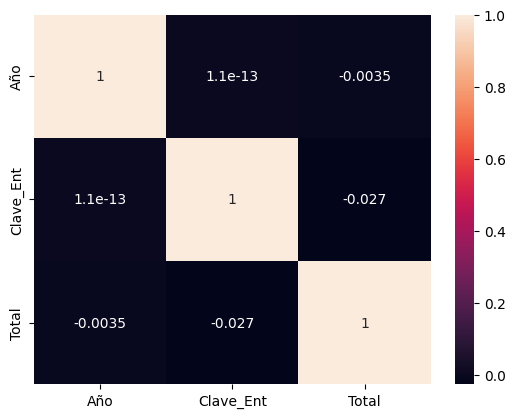

In [30]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('./Guardados/clean_crime_rate.csv')
df['Total'] = df['Enero'] + df['Febrero'] + df['Marzo'] + df['Abril'] + df['Mayo'] + df['Junio'] + df['Julio'] + df['Agosto'] + df['Septiembre'] + df['Octubre'] + df['Noviembre'] + df['Diciembre']
df['Total'] = df['Total'].astype(int)
#drop month columns
df.drop(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'], axis=1, inplace=True)
onlynumerical = df.drop(['Entidad','Bien jurídico afectado','Tipo de delito','Subtipo de delito','Modalidad','Sexo/Averiguación previa','Rango de edad','lat','lon'], axis=1)

sns.heatmap(onlynumerical.corr(), annot=True)
#saving the heatmap
plt.savefig('./Guardados/heatmap.png')

,Año,Entidad,Tipo de delito,Clave_Ent,lon,lat,Total
0,2015,Aguascalientes,Aborto,1,-102.2916,21.8818,5
1,2015,Aguascalientes,Abuso de confianza,1,-102.2916,21.8818,419
2,2015,Aguascalientes,Allanamiento de morada,1,-102.2916,21.8818,169
3,2015,Aguascalientes,Amenazas,1,-102.2916,21.8818,1148
4,2015,Aguascalientes,Contra el medio ambiente,1,-102.2916,21.8818,5
...,...,...,...,...,...,...,...
10651,2023,Zacatecas,Trata de personas,32,-102.5832,22.7709,11
10652,2023,Zacatecas,Tráfico de menores,32,-102.5832,22.7709,0
10653,2023,Zacatecas,Violación,32,-102.5832,22.7709,157
10654,2023,Zacatecas,Violencia de género en todas sus modalidades d...,32,-102.5832,22.7709,0


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,lat,lon,Total
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,21.8818,-102.2916,419
1,2015,1,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,21.8818,-102.2916,1860
2,2015,1,Aguascalientes,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,21.8818,-102.2916,179
3,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),21.8818,-102.2916,22
4,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),21.8818,-102.2916,2
...,...,...,...,...,...,...,...,...,...,...,...,...
82939,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Evasión de presos,Evasión de presos,Evasión de presos,Averiguación previa,No aplica,22.7709,-102.5832,2
82940,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsedad,Falsedad,Falsedad,Averiguación previa,No aplica,22.7709,-102.5832,157
82941,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Averiguación previa,No aplica,22.7709,-102.5832,58
82942,2023,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,Narcomenudeo,Narcomenudeo,Averiguación previa,No aplica,22.7709,-102.5832,181


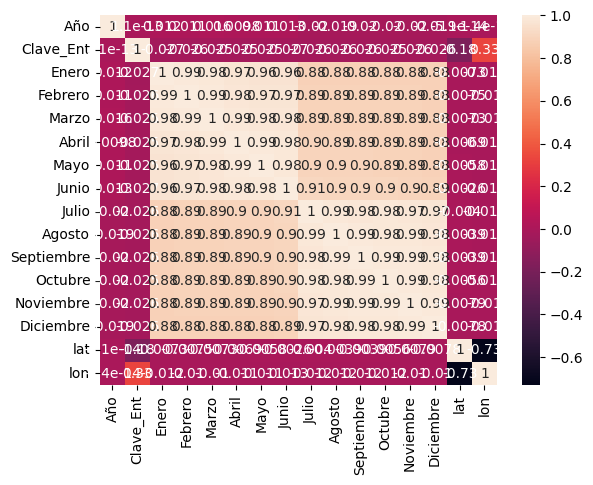

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto scaler
scaler = MinMaxScaler()

# Aplicar el scaler a la columna 'Total' del DataFrame
df=pd.read_csv('./Guardados/clean_crime_rate.csv')
#drop all non numerical columns
onlynumerical = df.drop(['Entidad','Bien jurídico afectado','Tipo de delito','Subtipo de delito','Modalidad','Sexo/Averiguación previa','Rango de edad'], axis=1)

sns.heatmap(onlynumerical.corr(), annot=True)
#sum the months into a new column total

df['Total'] = df['Enero'] + df['Febrero'] + df['Marzo'] + df['Abril'] + df['Mayo'] + df['Junio'] + df['Julio'] + df['Agosto'] + df['Septiembre'] + df['Octubre'] + df['Noviembre'] + df['Diciembre']
df['Total'] = df['Total'].astype(int)
#drop month columns
df.drop(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'], axis=1, inplace=True)
annual_crimes_df = df.groupby(['Año', 'Entidad','Tipo de delito', 'Clave_Ent','lon','lat'], as_index=False)['Total'].sum()


# Aplicar el scaler a la columna 'Total' del DataFrame
display(annual_crimes_df)
display(df)
annual_crimes_df.to_csv('./Guardados/Total_crime_rate.csv', index=False)